**Author:** Prof. AJ Smit

Department of Biodiversity and Conservation Biology

University of the Western Cape

# Topic 11: non-Metric multidimensional scaling (nMDS)

nMDS is a rank-based *indirect gradient analysis* (i.e. not an eigen-analysis) that uses a distance or dissimilarity matrix as input. Whereas the ordination methods discussed thus far try to maximise the variance or correspondence between sites, nMDS strives to represent pairwise dissimilarities between sites in ordination space. It does not use the distances or dissimilarities directly (hence *indirect*), but these are substituted with their ranks (e.g. dissimilarities between pairs of sites are ordered by rank) (and hence *non-metric* in the name). This results in a loss of insight into the magnitude of difference between site pairs, but we benefit from the technique being more robust and less influenced by deviations from idealised data distributions.

nMDS is the non-metric equavalent to PCoA, the latter sometimes being called metric multi-dimensional scaling.

## Set-up the analysis environment

In [1]:
library(tidyverse)
library(vegan)

── Attaching packages ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: permute

Loading required package: lattice

This is vegan 2.5-7



## The Doubs River data

We continue to use the species data:

In [2]:
spe <- read.csv("../Num_Ecol_R_book_ed1/DoubsSpe.csv")
spe <- dplyr::select(spe, -1)
spe <- dplyr::slice(spe, -8)

## Do the nMDS

In [3]:
spe_nmds <- metaMDS(spe, distance = "bray")
spe_nmds

Run 0 stress 0.07477809 
Run 1 stress 0.111888 
Run 2 stress 0.0742934 
... New best solution
... Procrustes: rmse 0.0239137  max resid 0.09220685 
Run 3 stress 0.1133734 
Run 4 stress 0.07477821 
... Procrustes: rmse 0.02385755  max resid 0.09285796 
Run 5 stress 0.1143509 
Run 6 stress 0.07506681 
Run 7 stress 0.1203765 
Run 8 stress 0.1141839 
Run 9 stress 0.08844549 
Run 10 stress 0.0884167 
Run 11 stress 0.07477809 
... Procrustes: rmse 0.02386774  max resid 0.0928463 
Run 12 stress 0.08841669 
Run 13 stress 0.1119529 
Run 14 stress 0.08930123 
Run 15 stress 0.1118885 
Run 16 stress 0.08843924 
Run 17 stress 0.1203424 
Run 18 stress 0.1127684 
Run 19 stress 0.1209555 
Run 20 stress 0.07376244 
... New best solution
... Procrustes: rmse 0.01458454  max resid 0.06329154 
*** No convergence -- monoMDS stopping criteria:
    20: stress ratio > sratmax



Call:
metaMDS(comm = spe, distance = "bray") 

global Multidimensional Scaling using monoMDS

Data:     spe 
Distance: bray 

Dimensions: 2 
Stress:     0.07376244 
Stress type 1, weak ties
No convergent solutions - best solution after 20 tries
Scaling: centring, PC rotation, halfchange scaling 
Species: expanded scores based on ‘spe’ 


In [4]:
# summary(spe_nmds) # not useful

See *Numerical Ecology in R* (pp. 145 to 149) for information about the interpretation of a nMDSand the ordination diagrams shown below.

## Ordination diagrams

We create the ordination diagrammes as before, but new concepts introduced here are **stress**, **Shepard plots**, and **goodness of fit**. The stress indicates the scatter of observed dissimilarities against an expected monotone regression, while a Shepard diagram plots ordination distances against original dissimilarities, and adds a monotone or linear fit line to highlight this relationship. The `stressplot()` function also produces two fit statistics. The goodness-of-fit of the ordination is measured as the $R^{2}$ of either a linear or a non-linear regression of the nMDS distances on the original ones.

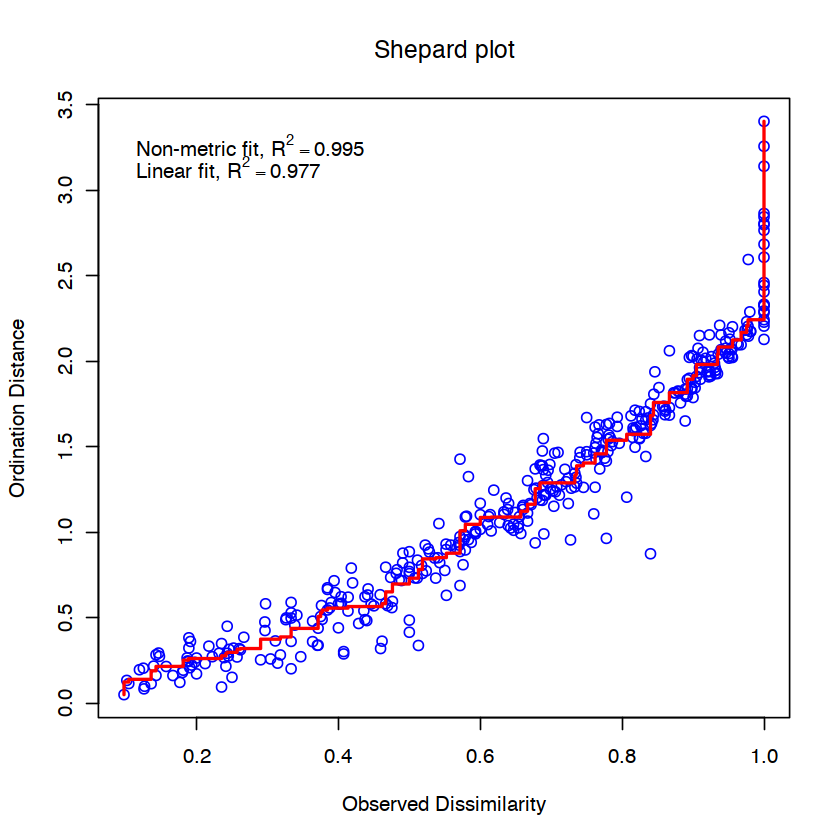

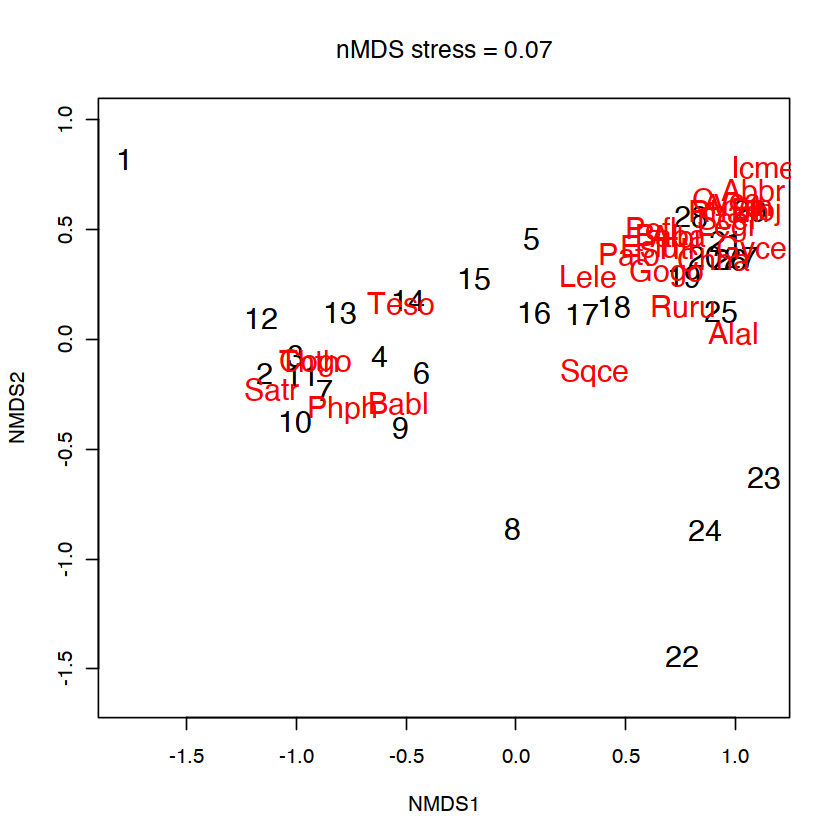

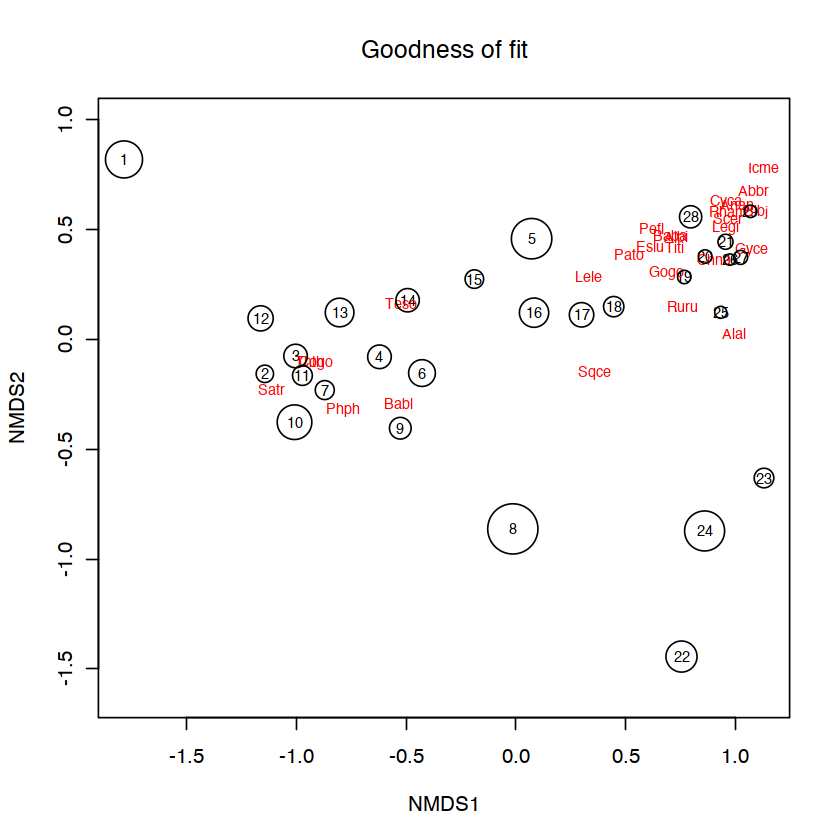

In [5]:
# par(mfrow = c(2, 2))
stressplot(spe_nmds, main = "Shepard plot")
ordiplot(spe_nmds, type = "t", cex = 1.5, main = paste0("nMDS stress = ", round(spe_nmds$stress, 2)))
gof = goodness(spe_nmds)
plot(spe_nmds, type = "t", main = "Goodness of fit")
points(spe_nmds, display = "sites", cex = gof * 200) # bigger bubbles indicate a worse fit

We can also build ordination plots from scratch to suit specific needs:

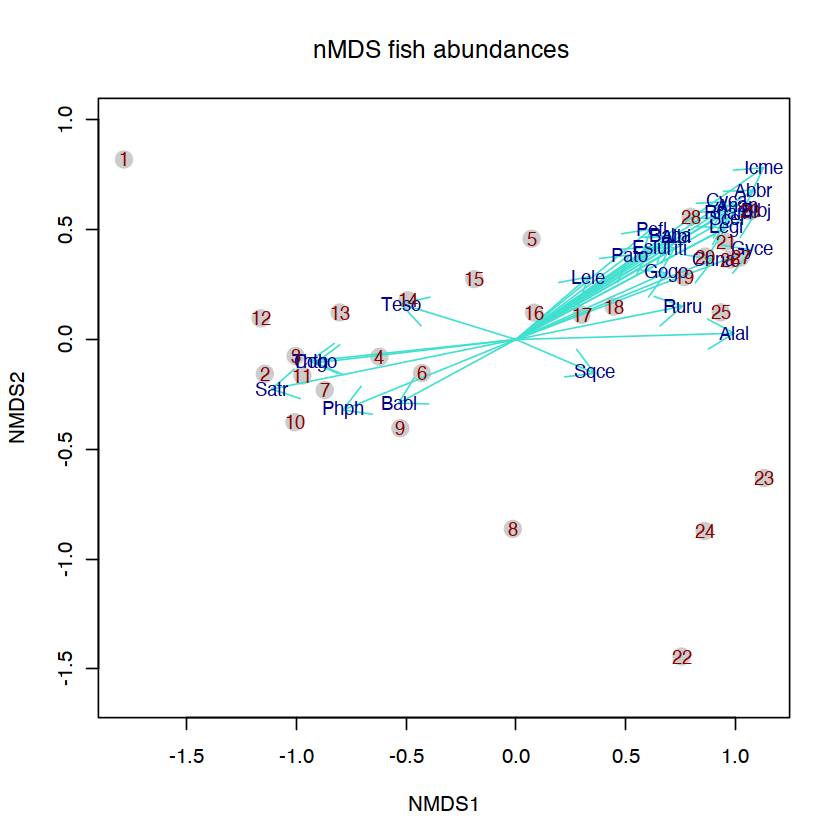

In [6]:
pl <- ordiplot(spe_nmds, type = "none", main = "nMDS fish abundances ")
points(pl, "sites", pch = 21, cex = 1.75, col = "grey80", bg = "grey80")
points(pl, "species", pch = 21, col = "turquoise", arrows = TRUE)
text(pl, "species", col = "blue4", cex = 0.9)
text(pl, "sites", col = "red4", cex = 0.9)

Or we can fit response surfaces using `ordisurf()` and project environmental drivers:

Loading required package: viridis

Loading required package: viridisLite




***VECTORS

       NMDS1    NMDS2     r2 Pr(>r)    
dfs  0.97109  0.23871 0.7489  0.001 ***
alt -0.98927 -0.14608 0.6113  0.001 ***
slo -0.74528  0.66676 0.3270  0.021 *  
flo  0.88625  0.46321 0.5683  0.001 ***
pH  -0.26663  0.96380 0.0177  0.795    
har  0.96284 -0.27008 0.3771  0.005 ** 
pho  0.46086 -0.88747 0.5435  0.001 ***
nit  0.87874 -0.47730 0.5820  0.001 ***
amm  0.43086 -0.90242 0.5542  0.001 ***
oxy -0.74384  0.66836 0.7394  0.001 ***
bod  0.44354 -0.89625 0.6567  0.001 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
Permutation: free
Number of permutations: 999



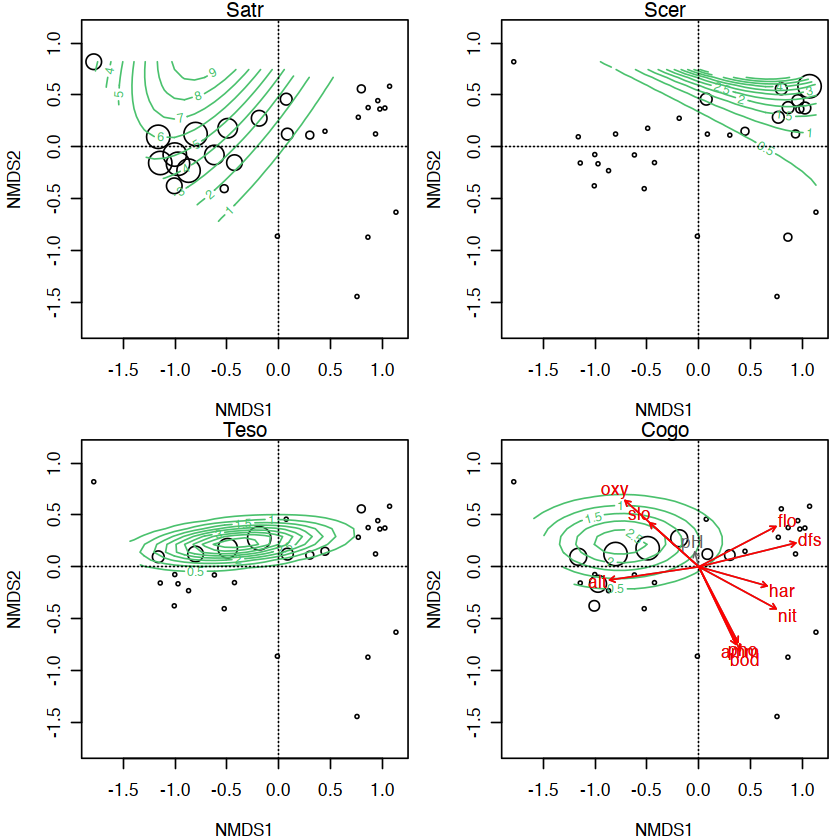

In [7]:
require('viridis')
palette(viridis(8))
par(mar = c(4, 4, 0.9, 0.5) + .1, mfrow = c(2, 2))
with(spe, tmp <- ordisurf(spe_nmds ~ Satr, bubble = 3,
                          family = quasipoisson, knots = 2, col = 6,
                          display = "sites", main = "Satr"))
abline(h = 0, v = 0, lty = 3)
with(spe, tmp <- ordisurf(spe_nmds ~ Scer, bubble = 3,
                          family = quasipoisson, knots = 2, col = 6,
                          display = "sites", main = "Scer"))
abline(h = 0, v = 0, lty = 3)
with(spe, tmp <- ordisurf(spe_nmds ~ Teso, bubble = 3,
                          family = quasipoisson, knots = 2, col = 6,
                          display = "sites", main = "Teso"))
abline(h = 0, v = 0, lty = 3)
with(spe, tmp <- ordisurf(spe_nmds ~ Cogo, bubble = 3,
                          family = quasipoisson, knots = 2, col = 6,
                          display = "sites", main = "Cogo"))
abline(h = 0, v = 0, lty = 3)

env <- read.csv("../Num_Ecol_R_book_ed1/DoubsEnv.csv")
env <- dplyr::select(env, -1)
env <- dplyr::slice(env, -8)

(spe_nmds_env <- envfit(spe_nmds, env)) 
plot(spe_nmds_env, col = "grey40")
plot(spe_nmds_env, p.max = 0.05, col = "red")

### Questions

1. Using two unconstrained ordination techniques of your choice, analyse the mite data in the **vegan** package. Provide a brief description and discussion of what you have found, and produce the R code.
2. Using two unconstrained ordination techniques of your choice (not already used in 1, above) analyse the dune data in the **vegan** package. Provide a brief description and discussion of what you have found, and produce the R code.

Submit an R script wherein you provide answers to these questions by no later than 17:00 on Friday 23 July 2021.